# Random Subsampling Analysis – White-Light Subsampling 45 Positions

This notebook evaluates the impact of subsampling on the reconstructed nano-FTIR interferograms and spectra.

---

## 1. Objective

Simulate subsampling to investigate the minimum number of interferometer positions needed to achieve reliable reconstruction of hyperspectral data while significantly reducing measurement time.

## 2. Load Data

Load the full interferogram dataset and associated metadata.

Simulation der komprimierten Messungen mit White-Light-Sampling über 45 Interferometerpositionen.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq, rfft, ifft, fft2
from scipy.io import loadmat
from scipy.stats import kde
from matplotlib import colors
from scipy.signal import blackman


In [2]:
spacialsmoothed1 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_15.14.12.mat ') 
Reko1=spacialsmoothed1["RekoCSspatialsmoothed"]
spacialsmoothed2 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_10.45.52.mat ') 
Reko2=spacialsmoothed2["RekoCSspatialsmoothed"]
spacialsmoothed3 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_10.51.34.mat ') 
Reko3=spacialsmoothed3["RekoCSspatialsmoothed"]
spacialsmoothed4 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_10.54.48.mat ') 
Reko4=spacialsmoothed4["RekoCSspatialsmoothed"]
spacialsmoothed5 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_11.01.27.mat ') 
Reko5=spacialsmoothed5["RekoCSspatialsmoothed"]
spacialsmoothed6 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_11.03.28.mat ') 
Reko6=spacialsmoothed6["RekoCSspatialsmoothed"]
spacialsmoothed7 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_11.08.47.mat ') 
Reko7=spacialsmoothed7["RekoCSspatialsmoothed"]
spacialsmoothed8 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_11.12.01.mat ') 
Reko8=spacialsmoothed8["RekoCSspatialsmoothed"]
spacialsmoothed9 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_11.16.18.mat ') 
Reko9=spacialsmoothed9["RekoCSspatialsmoothed"]
spacialsmoothed10 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_11.21.02.mat ') 
Reko10=spacialsmoothed10["RekoCSspatialsmoothed"]
spacialsmoothed11 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_11.25.18.mat ') 
Reko11=spacialsmoothed11["RekoCSspatialsmoothed"]
spacialsmoothed12 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_14.13.09.mat ') 
Reko12=spacialsmoothed12["RekoCSspatialsmoothed"]
spacialsmoothed13 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_14.17.05.mat ') 
Reko13=spacialsmoothed13["RekoCSspatialsmoothed"]
spacialsmoothed14 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_14.20.00.mat ') 
Reko14=spacialsmoothed14["RekoCSspatialsmoothed"]
spacialsmoothed15 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_14.28.25.mat ') 
Reko15=spacialsmoothed15["RekoCSspatialsmoothed"]
spacialsmoothed16 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_14.52.36.mat ') 
Reko16=spacialsmoothed16["RekoCSspatialsmoothed"]
spacialsmoothed17 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_14.56.01.mat ') 
Reko17=spacialsmoothed17["RekoCSspatialsmoothed"]
spacialsmoothed18 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_15.00.17.mat ') 
Reko18=spacialsmoothed18["RekoCSspatialsmoothed"]
spacialsmoothed19 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_25.11.2020_15.08.46.mat ') 
Reko19=spacialsmoothed19["RekoCSspatialsmoothed"]
spacialsmoothed20 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_01.12.2020_12.52.35.mat ') 
Reko20=spacialsmoothed20["RekoCSspatialsmoothed"]



(55, 55, 400)


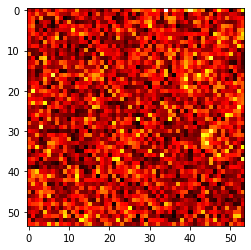

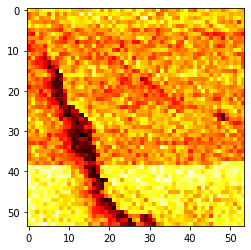

In [3]:
zweiD = np.zeros((54,54))
for i in range (0,54):
    for j in range (0,54):
        zweiD[i,j]= abs(Reko1[i,j,200])  
plt.imshow(zweiD, cmap='hot', interpolation='none')
plt.show()
datafull0 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_full_02.11.2020_14.23.48.mat')

datafull=datafull0["data_full"]
datafull.shape
zweiDb = np.zeros((54,54))

    for j in range (0,54):
        zweiDb[i,j]= abs(datafull[i,j,200])  

plt.title('Voller Datensatz')
plt.xlabel('Pixel')

plt.imshow(zweiDb, cmap='hot', interpolation='none')
cbar=plt.colorbar()
cbar.set_label('max(abs(Interferogram))')
plt.show()


In [5]:

def Filter(Filtertype, Resolution): #Resolution=Length complex data
    if Filtertype==1: #blackmann-Harris-3-Term
        b=np.zeros(400*3)
        Filtered=np.zeros(400*3)
        for z in range (199):
            b[z]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z)/(Resolution/2))  
            #b[z]=np.cos(np.pi*(z-Resolution/2))/(Resolution/2))
            #Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z-Resolution/2))/(Resolution/2)) 
        for z in range (200,400):
            b[z+800]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z+800]= 0.42323 + 0.49755*b[z+800] + 0.07922*np.cos(2*np.pi*(z+800)/(Resolution/2))  
        
        return Filtered
    if filtertype==2: #blackmann with gap
        gap = 0.4
        return blackManFn(z/Resolution, gap)

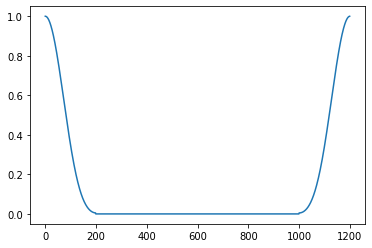

In [6]:
plt.plot(Filter(1,400))

In [7]:
def blackManFn(x, gap):
    if x >=gap and x <= (1 - gap):
        a=np.pi*((x - gap)*(0.5/(-gap + 0.5)) - 1/2)/(1/2)
        b=0.42323 + 0.49755*np.cos(a) + 0.07922*np.cos(2*a)
        return b
    if   x <=  gap or x >= 1 - gap:
        return 0.0049


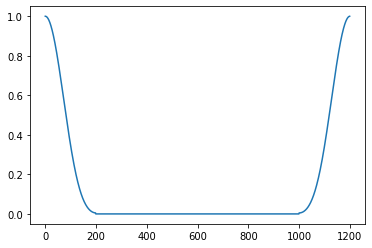

In [10]:
plt.plot(Filter(1,400))
#plt.plot( Filter(1,400*zerofilling))

In [11]:
#Signalregion 1
a=37 #good
b=15 #good

In [12]:
#Signalsignalregion 2
a=18 #good
b=7 #good

In [13]:
#Hintergrund
a=20 #good
b=13 #good

In [15]:
Rekonstruktion=Reko18[a,b]
phi=1.0
absolut=np.abs(10*np.exp(1j*phi)+(Rekonstruktion))
oWd=np.zeros(400)
for i in range (400):
    oWd[i]= i*(0.0008/399)*1000
    
subs18 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Data for matlab\\comprMeas_2020-10-08_140105_WL19.mat ') 
pos18 = subs18["rows_in1"]
subsampled18=subs18["data1"]
subs18=np.abs(10*np.exp(1j*phi)+(subsampled18[a,b]))-np.mean(absolut[0:10])
subs16 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Data for matlab\\comprMeas_2020-10-08_140105_WL17.mat ') 
pos16 = subs16["rows_in1"]
subsampled16=subs16["data1"]
subs16= np.abs(10*np.exp(1j*phi)+(subsampled16[a,b]))-np.mean(absolut[0:10])

fulldata = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_full_02.11.2020_14.23.48.mat ') 
data_full=fulldata["data_full"]

oWd18=np.zeros(45)
for i in range (0,44):
    oWd18[i]= (pos18[a,b,i]-1)*(0.0008/400)*1000
oWd16=np.zeros(45)
for i in range (0,44):
    oWd16[i]= (pos16[a,b,i]-1)*(0.0008/400)*1000

#ang = np.angle(Rekonstruktion)
#phi = np.mean(np.abs(np.cos(ang) + 1j * np.sin(ang)))
#print (phi)

absolut=np.abs(10*np.exp(1j*phi)+(Rekonstruktion))
I1 = np.abs(10*np.exp(1j*phi)+(Reko18[a,b]))-np.mean(absolut[0:10])
I11 = np.abs(10*np.exp(1j*phi)+(Reko16[a,b]))-np.mean(absolut[0:10])
I2 = np.abs(10*np.exp(1j*phi)+(data_full[a,b]))-np.mean(absolut[0:10])

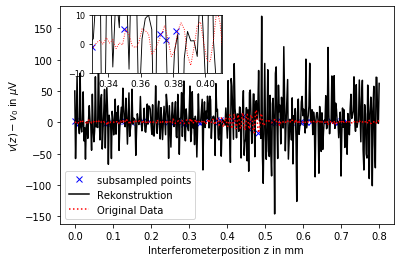

In [21]:
fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.65, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax1.plot(oWd18,subs18*1000, 'bx',label='subsampled points')
ax1.plot(oWd,I11*1000, 'k-',label='Rekonstruktion')
ax1.plot(oWd,I2*1000, 'r:',label='Original Data')
ax1.legend(loc='lower left')
ax2.plot(oWd18,subs18*1000, 'bx',label='subsampled points')
ax2.plot(oWd,I11*1000, 'k-',label='Rekonstruktion', linewidth=0.9)
ax2.plot(oWd,I2*1000, 'r:',label='Original Data',linewidth=0.9)
ax2.axis([0.33, 0.41, -10,10 ])


ax1.set_xlabel('Interferometerposition z in mm ')
ax1.set_ylabel('$v(z)-v_0$ in $\mu$V')
ax2.tick_params(axis='y', labelsize=8)
ax2.tick_params(axis='x', labelsize=9)
plt.show() 
#fig.savefig("45randS1good.pdf")

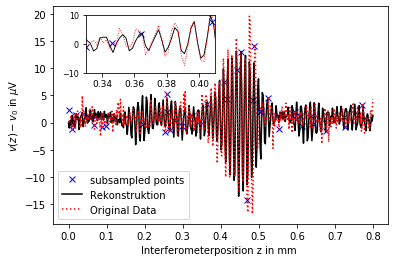

In [22]:
fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.65, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])


ax1.plot(oWd16,subs16*1000, 'bx',label='subsampled points')
ax1.plot(oWd,I1*1000, 'k-',label='Rekonstruktion')
ax1.plot(oWd,I2*1000, 'r:',label='Original Data')
ax1.legend(loc='lower left')
ax2.plot(oWd16,subs16*1000, 'bx',label='subsampled points')
ax2.plot(oWd,I1*1000, 'k-',label='Rekonstruktion', linewidth=0.9)
ax2.plot(oWd,I2*1000, 'r:',label='Original Data',linewidth=0.9)
ax2.axis([0.33, 0.41, -10,10 ])

ax1.set_xlabel('Interferometerposition z in mm ')
ax1.set_ylabel('$v(z)- v_0$ in $\mu$V')
ax2.tick_params(axis='y', labelsize=8)
ax2.tick_params(axis='x', labelsize=9)
plt.show() 
#fig.savefig("45randS1good.pdf")

Text(0, 0.5, 'abs Amplitude')

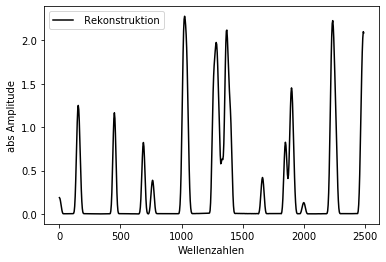

In [18]:
#### zerofilling=3

RekoA=np.zeros((400,),dtype = complex)
FullA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for i in range (0,399):
            RekoA[i]=(Reko16[a,b, i])
            

offsetReko=np.ones((400,),dtype = complex)*np.mean(RekoA[369:399,])
offReko= np.subtract(RekoA,offsetReko)

offRekozerofilling= np.concatenate([offReko,zerof])
wrapindexReko =230                                    #eventuell 299? wg mathematica
wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links

filReko = Filter(1,400)*wrapReko

ftReko = fft(filReko)
ftRekohalve16=ftReko[0:599]



plt.plot(wnVal[0:599,], np.absolute(ftRekohalve16),'k-',label=' Rekonstruktion')


plt.legend()

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

Text(0, 0.5, 'abs Amplitude')

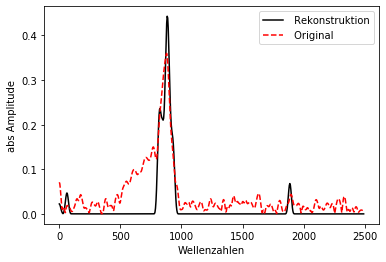

In [19]:
zerofilling=3

RekoA=np.zeros((400,),dtype = complex)
FullA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for i in range (0,399):
            RekoA[i]=(Reko18[a,b, i])
            FullA[i]=(data_full[a,b, i])
            

offsetReko=np.ones((400,),dtype = complex)*np.mean(RekoA[369:399,])
offReko= np.subtract(RekoA,offsetReko)

offRekozerofilling= np.concatenate([offReko,zerof])
wrapindexReko =230                                    #eventuell 299? wg mathematica
wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links

filReko = Filter(1,400)*wrapReko

ftReko = fft(filReko)
ftRekohalve18=ftReko[0:599]

offsetFull=np.ones((400,),dtype = complex)*np.mean(FullA[369:399,])
offFull= np.subtract(FullA,offsetFull)

offFullzerofilling= np.concatenate([offFull,zerof])
wrapindexFull =230                                    #eventuell 299? wg mathematica
wrapFull=np.roll(offFullzerofilling,-wrapindexFull)   # rollt nach links

filFull = Filter(1,400)*wrapFull

ftFull = fft(filFull)
ftFullhalve=ftFull[0:599]

plt.plot(wnVal[0:599,], np.absolute(ftRekohalve18),'k-',label=' Rekonstruktion')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'r--',label=' Original')

plt.legend()

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'abs Amplitude')

<Figure size 432x288 with 0 Axes>

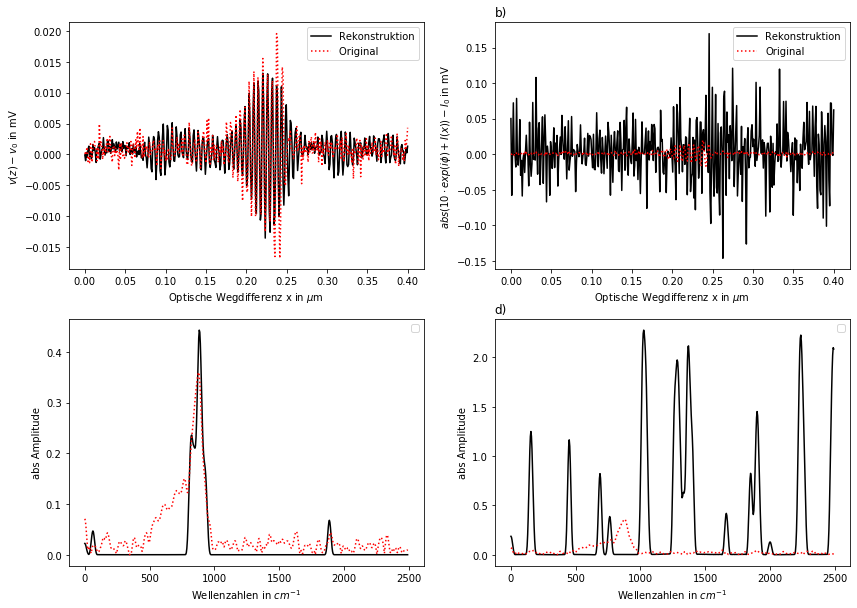

In [20]:
plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10)) 

a=plt.subplot(221) 
plt.title(' ',loc='left')
#plt.plot(oWd5,subs5, 'bx',label='subsampled Points')
plt.plot(oWd/2,I1, 'k-',label='Rekonstruktion')
plt.plot(oWd/2,I2, 'r:',label='Original ')

#plt.axis([0.00078, 0.001600, -0.015, 0.015])
plt.legend()
plt.xlabel('Optische Wegdifferenz x in $\mu$m ')
plt.ylabel('$v(z)-v_0$ in mV')

    

    
    

b=plt.subplot(222)
#plt.plot(oWd17,subs17, 'bx',label='subsampled Points')
plt.plot(oWd/2,I11, 'k-',label='Rekonstruktion')
plt.plot(oWd/2,I2, 'r:',label='Original')
plt.title('b)', loc='left')
#plt.axis([0.00078, 0.001600, -0.015, 0.015])
##plt.axis([1000, 1300, -0.5, 1.4])
plt.legend()
plt.xlabel('Optische Wegdifferenz x in $\mu$m ')
plt.ylabel('$abs(10\cdot exp({i \phi})+I(x))-I_0$ in mV')

plt.subplot(223) 
#plt.title('c)', loc='left')
plt.plot(wnVal[0:599,], np.absolute(ftRekohalve18),'k-')#,label=' Rekonstruktion')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'r:')#,label=' Rekonstruktion')


plt.legend()

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen in $cm^{-1}$')
plt.ylabel('abs Amplitude')

plt.subplot(224)
plt.title('d)', loc='left')
plt.plot(wnVal[0:599,], np.absolute(ftRekohalve16),'k-')#,label=' Rekonstruktion')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'r:')#,label=' Rekonstruktion')



plt.legend()

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen in $cm^{-1}$')
plt.ylabel('abs Amplitude')


#plt.savefig("45 Backgroundgoodbad.pdf")

In [24]:
SNR1=np.zeros((20),dtype=complex)
SNR2=np.zeros((20),dtype=complex)

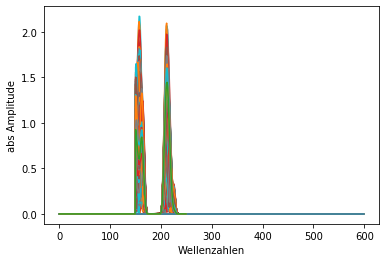

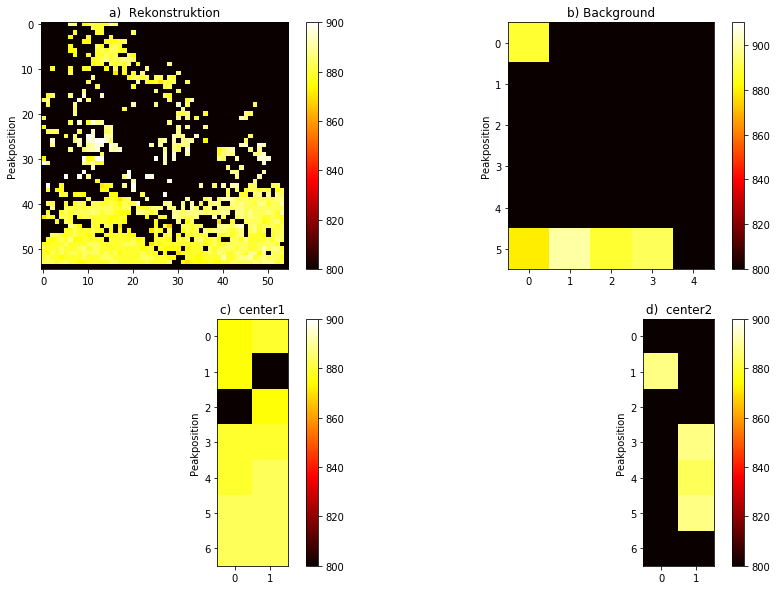

In [25]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))
'''wnZFVals = 
  Table[(j - 
      1)*1/(2*(zerofilling + 1)*
       importDataScanS/10000.), {j, (zerofilling + 1)*dimDat[[2]]}];'''
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko1[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        #print(offsetReko1)
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        #print(np.subtract(RekoA,-offsetReko)) 
        #plt.plot (np.real(offReko))
        offRekozerofilling= np.concatenate([offReko,zerof])
        #print(offRekozerofilling)
        #plt.plot (np.real(offRekozerofilling))
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #print (wrapReko)
        #plt.plot (np.real(wrapReko))
        plt.plot(np.zeros(600))
        #filtering
        filReko = Filter(1,400)*wrapReko
        #print(filReko)
        #plt.plot(np.absolute(filReko))
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]
plt.plot(np.absolute(ftRekohalve))

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10))

RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()


plt.subplot(221)
plt.imshow(pos_Reko_Max,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('a)  Rekonstruktion')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(222) 
plt.imshow(posback1Reko,vmin=800, vmax=910, cmap='hot', interpolation='none') #vmin=750, vmax=900
plt.title('b) Background')
#plt.legend()
plt.xlabel('')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(223)
plt.imshow(RekoA,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('c)  center1')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
plt.subplot(224)
plt.imshow(RekoA2,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('d)  center2')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
#plt.savefig("E3Indent_Peakposition.pdf")

NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[0]=SNRposReko
SNR2[0]=SNRposReko2

In [26]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko2[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[1]=SNRposReko
SNR2[1]=SNRposReko2



In [27]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko3[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[2]=SNRposReko
SNR2[2]=SNRposReko2



In [28]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko4[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[3]=SNRposReko
SNR2[3]=SNRposReko2



In [29]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko5[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[4]=SNRposReko
SNR2[4]=SNRposReko2



In [30]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko6[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[5]=SNRposReko
SNR2[5]=SNRposReko2



In [31]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko7[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[6]=SNRposReko
SNR2[6]=SNRposReko2



In [32]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko8[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[7]=SNRposReko
SNR2[7]=SNRposReko2



In [33]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko9[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[8]=SNRposReko
SNR2[8]=SNRposReko2



In [34]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko10[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[9]=SNRposReko
SNR2[9]=SNRposReko2



In [35]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko11[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[10]=SNRposReko
SNR2[10]=SNRposReko2



In [36]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko12[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[11]=SNRposReko
SNR2[11]=SNRposReko2



In [37]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko13[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[12]=SNRposReko
SNR2[12]=SNRposReko2



In [38]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko14[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[13]=SNRposReko
SNR2[13]=SNRposReko2



In [39]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko15[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[14]=SNRposReko
SNR2[14]=SNRposReko2



In [40]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko16[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[15]=SNRposReko
SNR2[15]=SNRposReko2



In [41]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko17[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[16]=SNRposReko
SNR2[16]=SNRposReko2



In [42]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko18[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[17]=SNRposReko
SNR2[17]=SNRposReko2



In [43]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko19[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[18]=SNRposReko
SNR2[18]=SNRposReko2



In [44]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko20[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=np.concatenate([np.zeros((150), dtype=complex),ftReko[150:250]])
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[19]=SNRposReko
SNR2[19]=SNRposReko2



In [45]:
SNR1[0]=0
SNR1[2]=0
SNR1[3]=0
SNR1[8]=0
SNR1[18]=0
SNR1[19]=0
SNR2[0]=0
SNR2[2]=0
SNR2[6]=0
SNR2[9]=0
SNR2[12]=0
SNR2[19]=0

print( 'center position 1' )

print( SNR1  )
print('is SNR of pos(max(Reko))' )
print( 'center position 2' )

print( SNR2 )
print('is SNR of pos(max(Reko))' )
np.save('SNR45WL_1', SNR1)
np.save('SNR45WL_2', SNR2)

center position 1
[0.        +0.j 0.7809792 +0.j 0.        +0.j 0.        +0.j
 0.36749895+0.j 2.60815077+0.j 0.62900834+0.j 2.00735448+0.j
 0.        +0.j 1.80901366+0.j 2.92694786+0.j 0.2958315 +0.j
 0.05670311+0.j 2.72632026+0.j 2.82118714+0.j 1.15470054+0.j
 3.09171371+0.j 1.62045323+0.j 0.        +0.j 0.        +0.j]
is SNR of pos(max(Reko))
center position 2
[0.        +0.j 0.64918372+0.j 0.        +0.j 0.25773375+0.j
 0.50744114+0.j 1.0416628 +0.j 0.        +0.j 0.9978773 +0.j
 0.40460963+0.j 0.        +0.j 0.0493985 +0.j 0.21728223+0.j
 0.        +0.j 1.17973762+0.j 0.27848628+0.j 0.52223297+0.j
 0.11514215+0.j 1.28695373+0.j 0.38895471+0.j 0.        +0.j]
is SNR of pos(max(Reko))


In [46]:
print (np.mean(SNR1),'is Mean of SNR1 with a standard deviation of', np.std(SNR1)/(np.sqrt(20-1)))

print (np.mean(SNR2),'is Mean of SNR2 with a standard deviation of', np.std(SNR2)/(np.sqrt(20-1)))
#,hörg Hoffmann, Taschenbuch der Messtechnik  6.Auflage  Hanser verlag S573

(1.1447931371570594+0j) is Mean of SNR1 with a standard deviation of 0.26458324633760616
(0.3948348263691669+0j) is Mean of SNR2 with a standard deviation of 0.09575886983245471


## 6. Results and Conclusion

- Subsampling retains large-scale spectral features.
- Signal-to-Noise Ratio (SNR) trends depend on the sampling percentage and spatial signal region.
- Broader features are preserved better; narrow crack features are more sensitive to undersampling.

Results suggest an optimal trade-off between acquisition speed and spectral reconstruction fidelity depending on the target feature resolution.
